# **01. PCA**

### **1-1. 데이터 세트 생성**

In [1]:
# 아래 코드를 실행시켜 주세요.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

- 클러스터링에 사용할 데이터 세트를 생성하겠습니다.
- 아래 조건을 참고하여 ```make_blobs``` 객체를 생성해 주세요.
  - 총 데이터의 개수 : 250
  - 피쳐의 개수 : 4
  - 군집 중심점의 개수 : 3
  - 표준 편차 : 2.5
- 빈칸(#####)을 채워주세요!




In [2]:
# 필요한 모듈 임포트
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples = 250, n_features = 4, centers = 3,
                  cluster_std = 2.5, random_state = 0)
print(X.shape, y.shape)

# 생성된 군집별 데이터 확인
unique, counts = np.unique(y, return_counts = True)
print(unique, counts)

(250, 4) (250,)
[0 1 2] [84 83 83]


생성된 데이터 세트를 데이터프레임으로 변환하겠습니다.

In [3]:
# 빈칸을 채워주세요.
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2', 'ftr3', 'ftr4'])
clusterDF['target'] = y

# 만들어진 데이터 확인
clusterDF.head(3)

,ftr1,ftr2,ftr3,ftr4,target
0,6.329183,-5.181660,10.221966,0.245427,2
1,9.183835,3.620694,6.660943,2.951015,2
2,1.884426,1.194259,-2.878990,6.532487,1


### **1-2. 군집화 수행**



```k-means``` 를 사용하여 군집화를 진행하도록 하겠습니다.

In [4]:
# 빈칸을 채워주세요
# k-means 사용 위해 필요한 모듈 임포트
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=25)
kmeans.fit(X)

# kmeans의 label_ 속성으로 군집화 결과 확인
print(kmeans.labels_)

[2 2 1 2 1 0 1 2 0 2 0 0 1 2 1 1 1 2 2 1 1 2 1 1 0 0 2 0 1 0 2 0 2 2 0 0 2
 1 2 2 1 0 1 2 1 2 1 1 0 2 2 2 0 2 1 2 1 1 1 2 0 2 2 2 2 2 1 2 0 2 0 0 1 0
 0 2 1 2 0 1 2 1 2 1 0 0 0 1 0 0 1 0 2 0 1 0 1 0 0 2 1 0 0 2 0 1 2 1 0 0 0
 0 1 1 1 0 0 0 1 1 2 2 1 1 1 0 1 1 1 0 1 1 2 2 0 2 2 2 1 0 1 2 2 2 2 1 2 2
 0 2 2 0 2 1 1 0 2 2 2 2 1 2 1 1 2 2 0 0 1 2 2 2 2 1 2 1 0 2 2 0 1 1 1 1 1
 1 0 2 1 1 1 2 0 0 1 0 1 2 0 0 0 1 0 0 0 0 0 2 0 1 2 0 1 0 2 0 0 2 0 0 0 0
 1 0 1 2 1 1 2 1 2 2 0 2 0 2 1 2 0 0 0 1 0 1 0 2 2 0 0 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


데이터를 생성할 때 정해진 y값과 군집화 결과 비교하겠습니다.

In [5]:
# DF cluster 칼럼에 군집화 결과 저장
clusterDF['cluster'] = kmeans.labels_

cluster_result = clusterDF.groupby(['target', 'cluster'])['ftr1'].count()
print(cluster_result)

target  cluster
0       0          75
        1           6
        2           3
1       0           8
        1          75
2       2          83
Name: ftr1, dtype: int64


### **1-3. 차원 축소**

차원 축소를 위해 PCA를 사용하겠습니다.

*    2차원으로 축소


In [6]:
from sklearn.decomposition import PCA

# 빈칸을 채워주세요
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(X)

In [7]:
# 빈칸을 채워주세요.
# 데이터프레임에 차원축소 결과값을 저장하겠습니다.
# 0 칼럼의 값은 pca_x 에, 1 칼럼의 값은 pca_y에 추가해 주세요.

clusterDF['pca_x'] = pca_transformed[:,0]
clusterDF['pca_y'] = pca_transformed[:,1]
clusterDF.head(3)

,ftr1,ftr2,ftr3,ftr4,target,cluster,pca_x,pca_y
0,6.329183,-5.181660,10.221966,0.245427,2,2,9.854315,-1.672750
1,9.183835,3.620694,6.660943,2.951015,2,2,6.160242,0.856106
2,1.884426,1.194259,-2.878990,6.532487,1,1,-4.099455,-2.984102


결과를 시각화하겠습니다.
아래 코드를 실행시켜주세요.

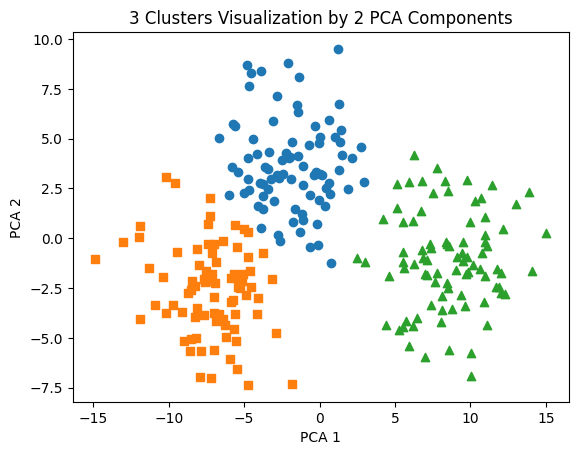

In [8]:
marker0_ind = clusterDF[clusterDF['cluster']==0].index
marker1_ind = clusterDF[clusterDF['cluster']==1].index
marker2_ind = clusterDF[clusterDF['cluster']==2].index

plt.scatter(x=clusterDF.loc[marker0_ind, 'pca_x'], y=clusterDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=clusterDF.loc[marker1_ind, 'pca_x'], y=clusterDF.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=clusterDF.loc[marker2_ind, 'pca_x'], y=clusterDF.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')

plt.show()

# **02. 군집 평가**

### **2-1. 실루엣 분석**

실루엣 계수와 평균 실루엣 계수를 계산하겠습니다.

In [9]:
# 빈칸(#####)을 채워주세요.

# 필요한 모튤 임포트
from sklearn.metrics import silhouette_samples, silhouette_score

# 실루엣 계수 계산
clusterDF['silhouette_coeff'] = silhouette_samples(X, clusterDF['cluster'])

# 평균 실루엣 계수 계산
average_score = silhouette_score(X, clusterDF['cluster'])
print('Silhouette Analysis Score:{0:.3f}'.format(average_score))

# DataFrame - 실루엣 계수 확인
clusterDF.head()

Silhouette Analysis Score:0.401


,ftr1,ftr2,ftr3,ftr4,target,cluster,pca_x,pca_y,silhouette_coeff
0,6.329183,-5.181660,10.221966,0.245427,2,2,9.854315,-1.672750,0.498292
1,9.183835,3.620694,6.660943,2.951015,2,2,6.160242,0.856106,0.291292
2,1.884426,1.194259,-2.878990,6.532487,1,1,-4.099455,-2.984102,0.296198
3,11.304940,-0.863021,4.571105,-1.461580,2,2,9.945728,0.837735,0.551642
4,0.617906,5.770637,2.418191,9.966840,1,1,-5.419834,-2.004546,0.238846


군집별 평군 실루엣 계수를 계산하겠습니다.

In [10]:
clusterDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.349219
1    0.372137
2    0.479223
Name: silhouette_coeff, dtype: float64

### **2-2. 실루엣 계수 시각화**

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

위 링크의 코드를 활용하여 실루엣 계수를 시각화하고,
최적의 n_cluster를 찾아보겠습니다.


In [11]:
# 필요한 모듈 임포트
# 코드를 실행시켜 주세요
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

군집의 개수를 변화시켜가며 실루엣 계수를 시각화하겠습니다.

In [12]:
# 빈칸을 채워주세요
# 2,3,4,5,6 순서로 n_cluster를 변화시켜가며 시각화 할 것입니다.
range_n_clusters = [ 2, 3, 4, 5, 6]

For n_clusters = 2 The average silhouette_score is : 0.4686117846718755
For n_clusters = 3 The average silhouette_score is : 0.4013659451863337
For n_clusters = 4 The average silhouette_score is : 0.31244663103453185
For n_clusters = 5 The average silhouette_score is : 0.2675062025067157
For n_clusters = 6 The average silhouette_score is : 0.24894345016929734


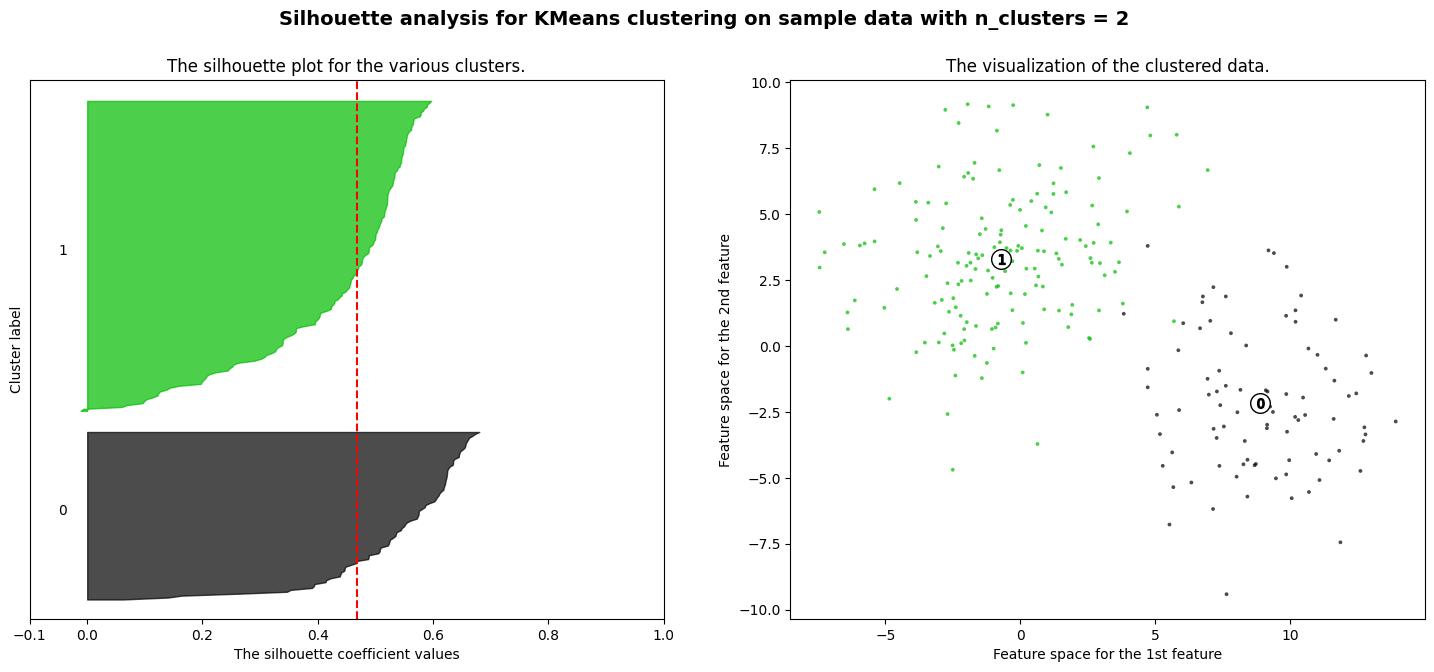

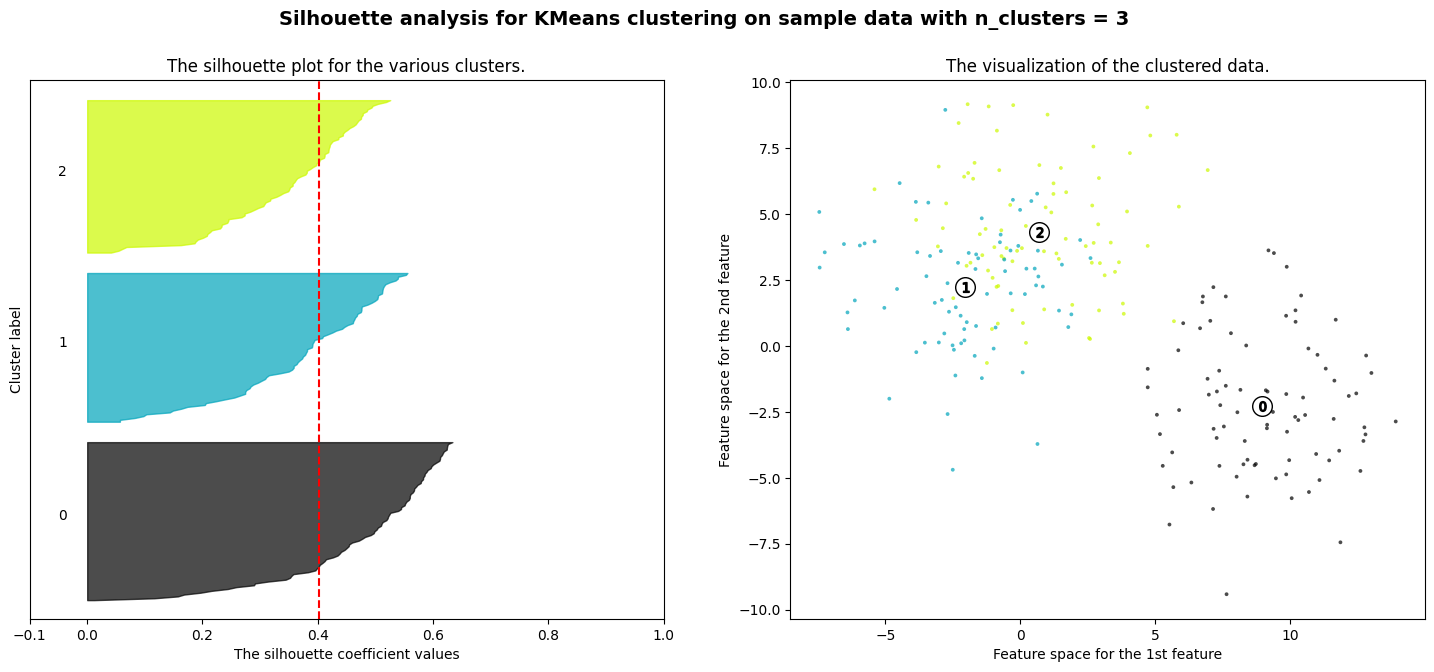

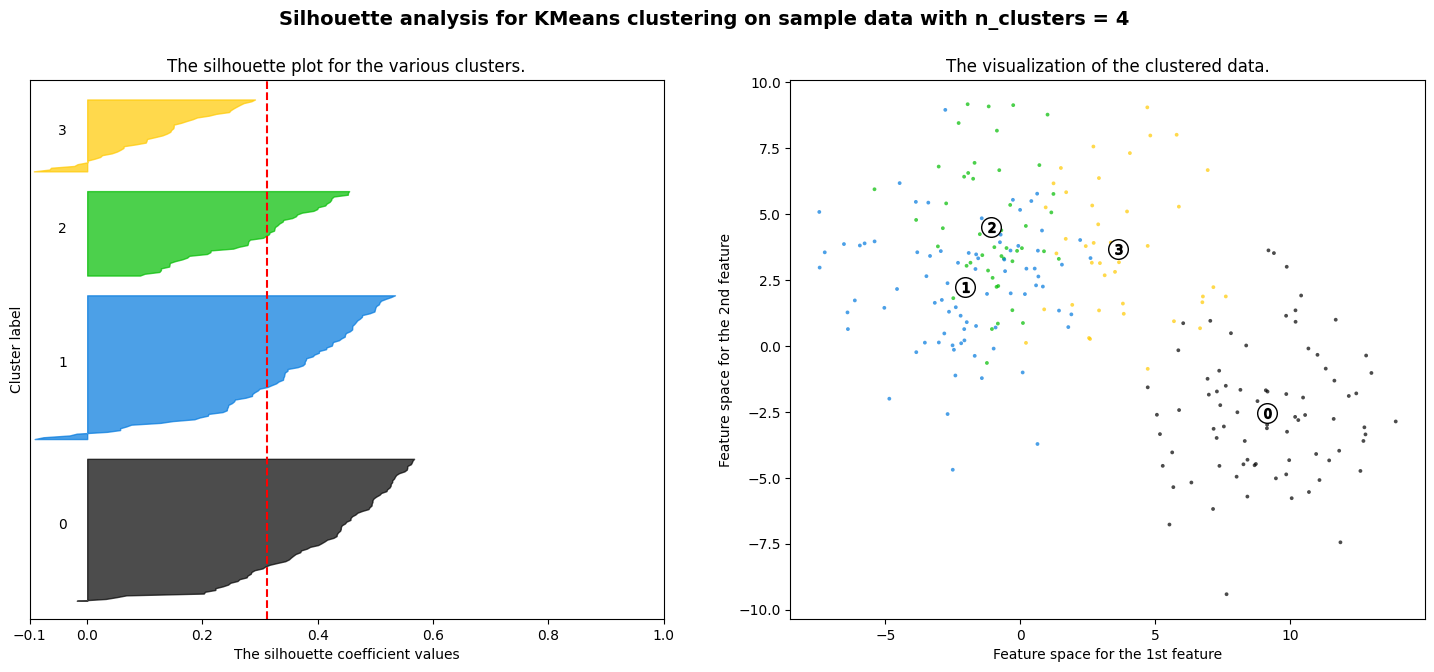

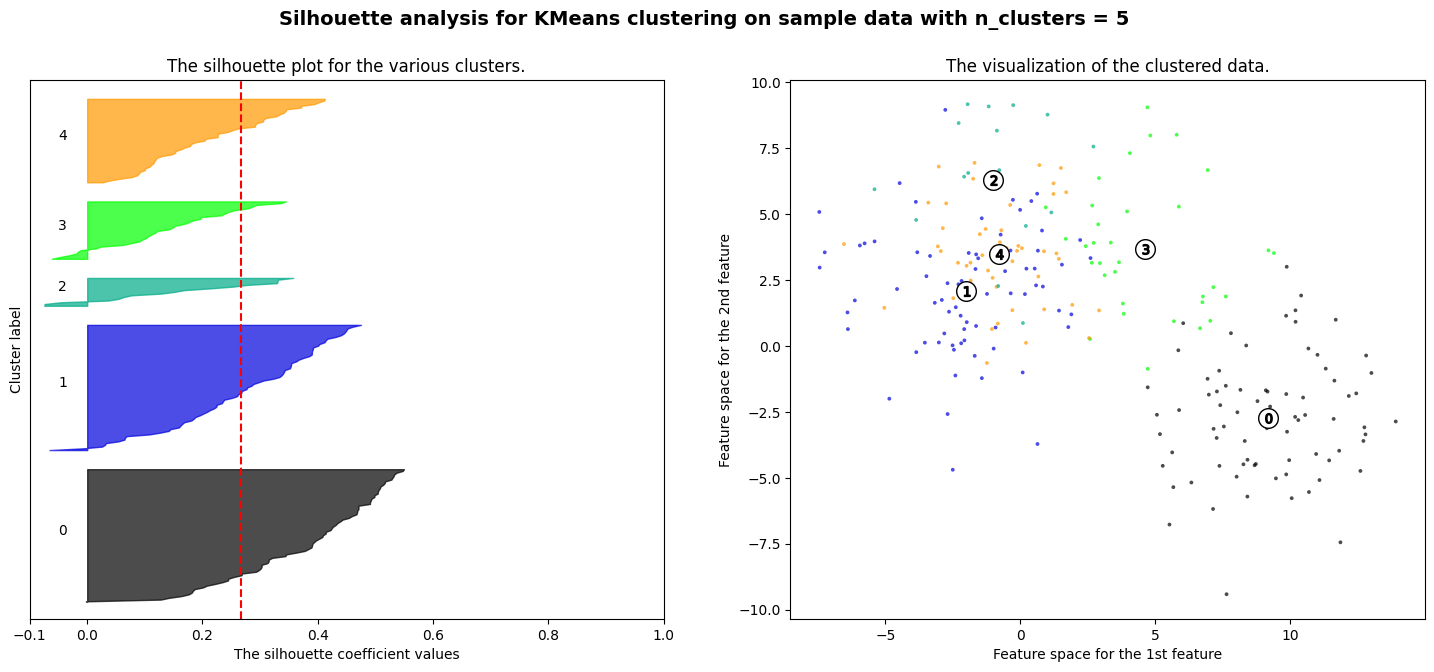

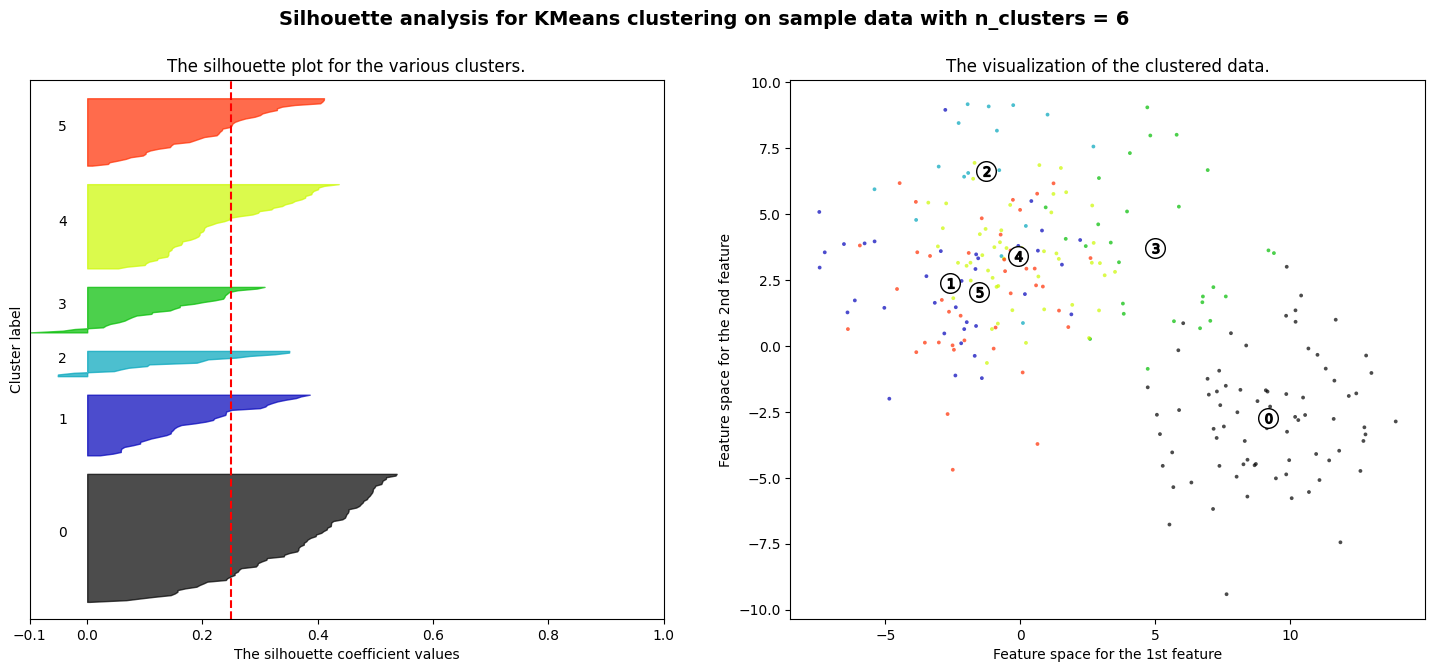

In [13]:
# 코드를 실행해 주세요

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])

    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_

    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

# **03. 평균 이동**

'####' 표시가 된 부분을 채워주세요.

In [14]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=0.6, random_state=0)

### **3-1.**

In [15]:
# 대역폭을 0.7로 설정해 주세요.

meanshift= MeanShift(bandwidth=0.7)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5 6 7 8]


#### Q. 군집이 몇개로 분류되었나요?
답 : 9

### **3-2. 아래 문항에 ```O, X```로 답해주세요.**
#### 군집 개수를 줄이기 위해서는 대역폭을 **작게** 설정해야 한다.

답 : X

### **3-3.**

In [16]:
# 대역폭을 1.2로 설정해 주세요.

meanshift= MeanShift(bandwidth=1.2)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


#### Q. 군집이 몇개로 분류되었나요?
답 : 3

### **3-4. 최적화된 ```bandwidth``` 값을 찾기 위한 코드를 작성해 주세요.**

In [17]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print('bandwidth 값:', round(bandwidth,3))

bandwidth 값: 1.563


### **3-5. 최적화된 bandwidth 값을 적용하여 군집화를 수행해 보세요.**

In [18]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X)

meanshift= MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


# **04. GMM**

### **4-1. GMM과 K-평균 비교**

- 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체 등을 인자로 받아 클러스터링 결과를 시각화하는 ```visualize_cluster_plot``` 함수를 정의하겠습니다.

In [19]:
# 아래 코드를 실행시켜 주세요.

def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_

    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', '*', 'x']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)

        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)

        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'

    plt.legend(loc=legend_loc)
    plt.show()

'#####' 표시가 된 부분을 채워주세요.

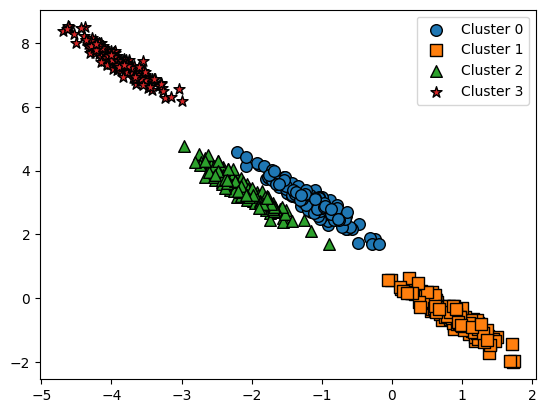

In [20]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# make_blobs() 로 600개의 데이터 세트, 4개의 군집 세트, cluster_std=0.5 을 만듬.
X, y = make_blobs(n_samples=600, n_features=2, centers=4,cluster_std=0.5, random_state=0)

# 길게 늘어난 타원형의 데이터 셋을 생성하기 위해 변환함.
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

# feature 데이터 셋과 make_blobs( ) 의 y 결과 값을 DataFrame으로 저장
clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

# 생성된 데이터 셋을 target 별로 다른 marker 로 표시하여 시각화 함.
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


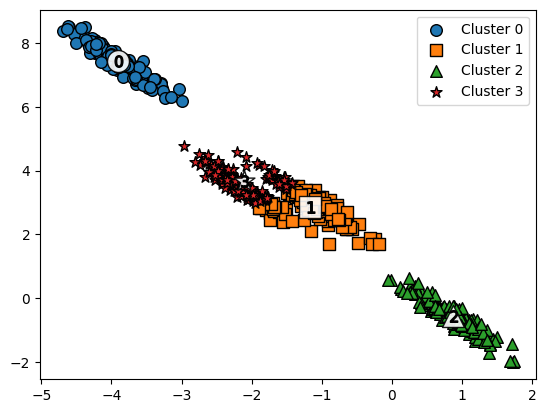

In [21]:
from sklearn.cluster import KMeans

# 4개의 Cluster 기반 Kmeans 를 X_aniso 데이터 셋에 적용
kmeans = KMeans(4, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label'] = kmeans_label

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label',iscenter=True)

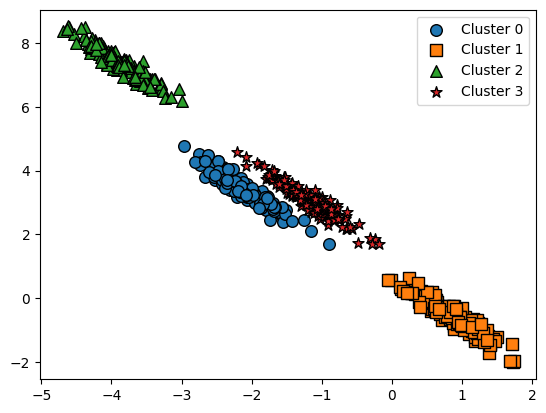

In [22]:
from sklearn.mixture import GaussianMixture

# 4개의 n_components기반 GMM을 X_aniso 데이터 셋에 적용
gmm = GaussianMixture(n_components=4, random_state=0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label'] = gmm_label

# GaussianMixture는 cluster_centers_ 속성이 없으므로 iscenter를 False로 설정.
visualize_cluster_plot(gmm, clusterDF, 'gmm_label',iscenter=False)

In [23]:
print('### KMeans Clustering ###')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print('\n### Gaussian Mixture Clustering ###')
print(clusterDF.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       1               115
        3                35
1       2               150
2       3               120
        1                30
3       0               150
Name: kmeans_label, dtype: int64

### Gaussian Mixture Clustering ###
target  gmm_label
0       3            150
1       1            150
2       0            150
3       2            150
Name: gmm_label, dtype: int64


#### Q. 군집화 효율이 더 좋은 것은 GMM인가요? KMeans인가요?

답: GMM

# **05. DBSCAN**

'#####' 표시가 된 부분을 채워주세요.

In [28]:
from sklearn.datasets import load_wine

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

wine = load_wine()

# 보다 편리한 데이터 Handling을 위해 DataFrame으로 변환
wineDF = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wineDF['target'] = wine.target

In [34]:
from sklearn.cluster import DBSCAN

# 입실론을 7, 최소 데이터 개수를 4로 설정한 후 DBSCAN 함수를 완성하세요.
dbscan = DBSCAN(eps=7, min_samples=4, metric='euclidean')
dbscan_labels = dbscan.fit_predict(wine.data)

wineDF['dbscan_cluster'] = dbscan_labels
wineDF['target'] = wine.target

wine_result = wineDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(wine_result)

target  dbscan_cluster
0       -1                58
         0                 1
1       -1                64
         1                 4
         0                 3
2       -1                46
         0                 2
Name: dbscan_cluster, dtype: int64


In [30]:
# 아래 코드를 실행해 주세요.

def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_

    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)

        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)

        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'

    plt.legend(loc=legend_loc)
    plt.show()

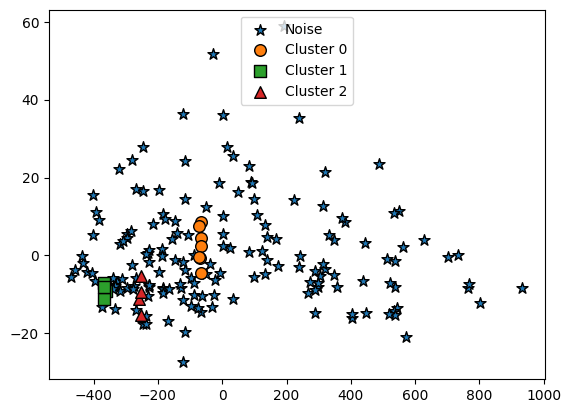

In [37]:
from sklearn.decomposition import PCA

# 2차원으로 시각화하기 위해 PCA n_componets=2로 피처 데이터 세트 변환
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(wine.data)

# visualize_cluster_2d( ) 함수는 ftr1, ftr2 컬럼을 좌표에 표현하므로 PCA 변환값을 해당 컬럼으로 생성
wineDF['ftr1'] = pca_transformed[:,0]
wineDF['ftr2'] = pca_transformed[:,1]

visualize_cluster_plot(dbscan, wineDF, 'dbscan_cluster', iscenter=False)

target  dbscan_cluster
0       -1                58
         0                 1
1       -1                60
         1                 4
         2                 4
         0                 3
2       -1                45
         0                 3
Name: dbscan_cluster, dtype: int64


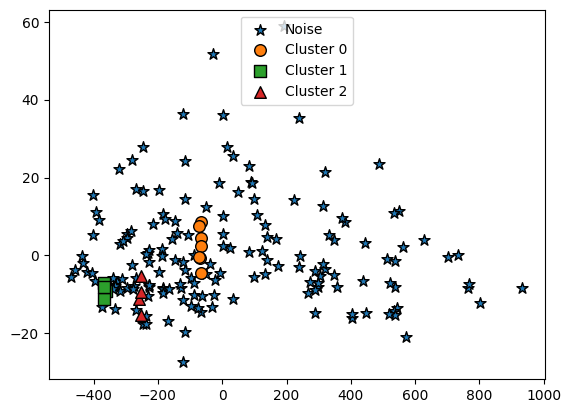

In [38]:
from sklearn.cluster import DBSCAN

#입실론을 8, 최소 데이터 개수를 4로 설정한 후 DBSCAN 함수를 완성하세요.
dbscan = DBSCAN(eps=8, min_samples=4, metric='euclidean')
dbscan_labels = dbscan.fit_predict(wine.data)

wineDF['dbscan_cluster'] = dbscan_labels
wineDF['target'] = wine.target

wine_result = wineDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(wine_result)

visualize_cluster_plot(dbscan, wineDF, 'dbscan_cluster', iscenter=False)

target  dbscan_cluster
0       -1                58
         0                 1
1       -1                69
         0                 2
2       -1                46
         0                 2
Name: dbscan_cluster, dtype: int64


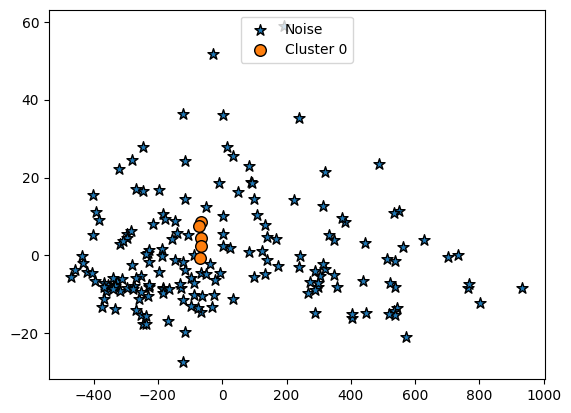

In [39]:
# 입실론을 7, 최소 데이터 개수를 5로 설정한 후 DBSCAN 함수를 완성하세요.
dbscan = DBSCAN(eps=7, min_samples=5, metric='euclidean')
dbscan_labels = dbscan.fit_predict(wine.data)

wineDF['dbscan_cluster'] = dbscan_labels
wineDF['target'] = wine.target

wine_result = wineDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(wine_result)

visualize_cluster_plot(dbscan, wineDF, 'dbscan_cluster', iscenter=False)